In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, cophenet, leaves_list
from scipy.spatial.distance import squareform

from mesmerize import Transmission
from mesmerize.analysis.math.emd import emd_1d
from sklearn.metrics import pairwise_distances, silhouette_score
import pandas as pd

/home/kushal/python-venvs/mesmerize/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, leaves_list


# Adapted from the navis package:
# https://github.com/schlegelp/navis/blob/d1da4666464988f60a056bc767bfcc3ef943ef43/navis/clustering/cluster.py#L683
def calc_agg_coeff(lkg) -> float:
    """
    Calculate the agglomerative coefficient.

    This measures the clustering structure of the linkage matrix. Because
    it grows with the number of observations, this measure should not be
    used to compare datasets of very different sizes.

    For each observation i, denote by m(i) its dissimilarity to the first
    cluster it is merged with, divided by the dissimilarity of the merger
    in the final step of the algorithm. The agglomerative coefficient is
    the average of all 1 - m(i).
    
    Parameters
    ----------
    lkg: np.ndarray
        Linkage matrix returned from scipy.cluster.hierarchy.linkage
    
    Returns
    -------
    float
        Agglomerative Coefficient
    
    """
    # Turn into pandas DataFrame for fancy indexing
    Z = pd.DataFrame(lkg, columns=['obs1', 'obs2', 'dist', 'n_org'])
    
    leaves = leaves_list(lkg)

    # Get all distances at which an original observation is merged
    all_dist = Z[(Z.obs1.isin(leaves)) | (Z.obs2.isin(leaves))].dist.values

    # Divide all distances by last merger
    all_dist /= lkg[-1][2]

    # Calc final coefficient
    coeff = np.mean(1 - all_dist)

    return coeff

In [3]:
d_emd = np.loadtxt('/home/kushal/Sars_stuff/DM_EMD.txt')

d_euc = np.loadtxt('/home/kushal/Sars_stuff/DM_EUC_FFT.txt')

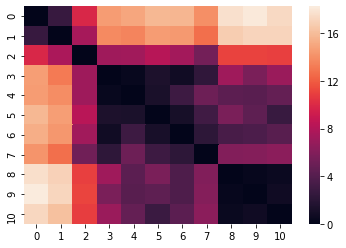

In [4]:
sns.heatmap(d_emd)

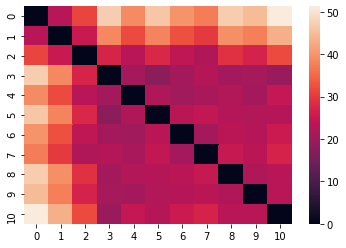

In [5]:
sns.heatmap(d_euc)

In [6]:
d_emd = squareform(d_emd, checks=False)
d_euc = squareform(d_euc, checks=False)

In [7]:
Z_emd = linkage(d_emd, method='complete', optimal_ordering=True)
Z_euc = linkage(d_euc, method='complete', optimal_ordering=True)

In [8]:
calc_agg_coeff(Z_emd)

0.8411572356393862

In [9]:
calc_agg_coeff(Z_euc)

0.5736315154229096